In [1]:
#RENEWABLE ENERGY SOURCES - team 1
#WASTE IDENTIFICATION USING MACHINE LEARNING
#THIS MODEL CAN BE USED TO DIFFERENTIATE BETWEEN WASTES AND CAN 
#BE FURTHER INCORPORATED ON A LARGE SCALE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale = 1./255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True)

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
input_classes = ['Organic','Reusable']
label_encoder.fit(input_classes)
for i, item in enumerate(label_encoder.classes_):print(item,'-->',i)
input_classes=['Organic','Reusable']

Organic --> 0
Reusable --> 1


In [51]:
import splitfolders
data = 'DATASET/train'
split = 'DATASET/train/split'
def train_test_valid(train_size=0.7,test_size=0.15,val_size=0.15,images_folder=data,split=split):
    train_size=train_size
    test_size=test_size
    val_size=val_size
    input_folder=images_folder
    output_folder=split
    splitfolders.ratio(input_folder,output_folder,seed=1337,ratio=(train_size,test_size,val_size),group_prefix=None)
train_test_valid()





Copying files: 0 files [02:36, ? files/s]
Copying files: 0 files [01:57, ? files/s]
Copying files: 0 files [01:20, ? files/s]




Copying files: 25 files [00:00, 249.46 files/s]



Copying files: 83 files [00:00, 300.02 files/s]



Copying files: 156 files [00:00, 364.41 files/s]



Copying files: 225 files [00:00, 424.42 files/s]



Copying files: 274 files [00:00, 440.25 files/s]



Copying files: 348 files [00:00, 499.72 files/s]



Copying files: 424 files [00:00, 556.63 files/s]



Copying files: 497 files [00:00, 597.81 files/s]



Copying files: 562 files [00:00, 587.08 files/s]



Copying files: 634 files [00:01, 617.97 files/s]



Copying files: 699 files [00:01, 613.05 files/s]



Copying files: 763 files [00:01, 575.44 files/s]



Copying files: 823 files [00:01, 572.90 files/s]



Copying files: 884 files [00:01, 583.21 files/s]



Copying files: 944 files [00:01, 583.75 files/s]



Copying files: 1004 files [00:01, 579.42 files/s]



Copying files: 1063 files [00:01, 4

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height=500 #dimensions of the image 
img_width=500
batch_size=16#number of images utilized in 1 epoch
train_path='DATASET/train/split/train'
test_path='DATASET/train/split/test'
valid_path='DATASET/train/split/val'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
train_img_gen = ImageDataGenerator(
                                  rescale = 1./255,#rescaling all the images to equal pixel size to avoid ambiguity [0,255]->[0,1]
                                  shear_range = 0.2,#to slant the image
                                  zoom_range = 0.2,#zoom the image
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)
train = train_img_gen.flow_from_directory( #to directly read the images from the given directory
      train_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary',#for giving the index to classes used - binary since 1 - normal 0 - cancer
      batch_size=16,
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='binary',
      batch_size=16,
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary', 
      batch_size=16,
      )

Found 1421 images belonging to 2 classes.
Found 273 images belonging to 2 classes.
Found 304 images belonging to 2 classes.


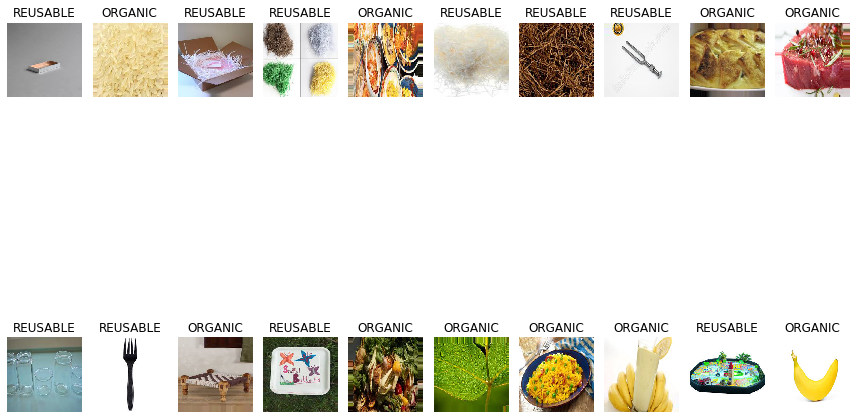

In [54]:
plt.figure(figsize=(12, 12))
for i in range(0, 20):
    plt.subplot(2, 10, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'ORGANIC', 1:'REUSABLE'}#LABELING THE DATA AND DISPLAY OF SOME IMAGE DATASETS FOR BETTER UNDERSTANDING
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
#HERE WE ARE GOING TO USE THE CONVOLUTIONAL NEURAL NETWORK IN ORDER TO TRAIN OUR DATASET IN A BETTER WAY
#kernel size =3*3 ie we have applied a filter of matrix 3*3 on the input image and have extracted the features
#NUMBER OF FILTERS USED  FOR PROPER FEATURE EXTRACTION
#ACTIVATION = RECTIFIED LINEAR UNTI
#POOLING SIZE 2*2
#OPTIMIZER USED IS ADAM 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(activation = 'relu', units = 32))
model.add(Dense(activation = 'relu', units = 16))
model.add(Dense(activation = 'sigmoid', units = 1))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 247, 247, 16)      4624      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 123, 123, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 121, 121, 16)      2320      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 60, 60, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 57600)            

In [59]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)#finding input weight size 

{0: 0.9759615384615384, 1: 1.0252525252525253}


In [60]:
hist=model.fit(train,epochs=5,validation_data=(valid),callbacks=callbacks_list,class_weight=cw)

Epoch 1/5


Copying files: 0 files [01:41, ? files/s]


89/89 [==============================] - 190s 2s/step - loss: 0.5823 - accuracy: 0.6681 - val_loss: 0.3981 - val_accuracy: 0.8224
Epoch 2/5
89/89 [==============================] - 178s 2s/step - loss: 0.3428 - accuracy: 0.8728 - val_loss: 0.3582 - val_accuracy: 0.8553
Epoch 3/5
89/89 [==============================] - 188s 2s/step - loss: 0.3810 - accuracy: 0.8412 - val_loss: 0.3458 - val_accuracy: 0.8618
Epoch 4/5
89/89 [==============================] - 183s 2s/step - loss: 0.3227 - accuracy: 0.8659 - val_loss: 0.3310 - val_accuracy: 0.8684
Epoch 5/5
89/89 [==============================] - 214s 2s/step - loss: 0.3213 - accuracy: 0.8712 - val_loss: 0.3190 - val_accuracy: 0.8717


In [78]:
loss, accuracy = model.evaluate(test)
print("\n\nLoss: ", loss)
print("Accuracy: {:.2f}".format(accuracy*100),"\n")

18/18 [==============================] - 6s 328ms/step - loss: 0.2532 - accuracy: 0.9011


Loss:  0.25322225689888
Accuracy: 90.11 



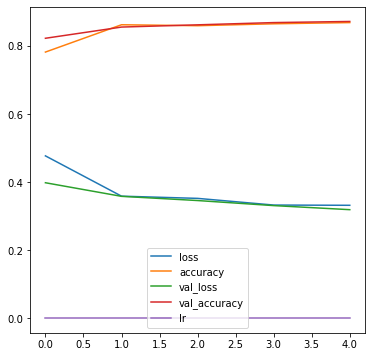

In [79]:
#EVALUATION OF THE MODEL BY PLOTTING THE NECESSARY PARAMETERS
df = pd.DataFrame(hist.history)
df.plot(figsize=(6,6))
plt.legend() 


18/18 [==============================] - 6s 324ms/step


<AxesSubplot:>

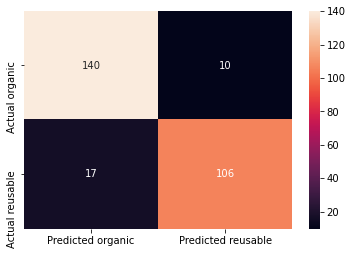

In [80]:
preds = model.predict(test,verbose=1)
#REQUIRED PARAMETERS FOR THE CONFUSION MATRIX
predictions = preds.copy()
predictions[predictions <= 0.5] = 0 #it is organic case
predictions[predictions > 0.5] = 1 #it is reusable case
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual organic", "Actual reusable"],
columns=["Predicted organic", "Predicted reusable"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

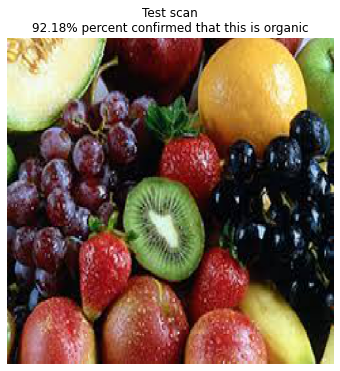

In [84]:
# Testing 
img_path = 'DATASET/organic.jpg'
from tensorflow.keras.preprocessing import image
test_img = image.load_img(img_path, target_size=(500, 500,3),color_mode='rgb')
# Preprocessing the image
pp_test_img = image.img_to_array(test_img)
pp_test_img = pp_test_img/255
pp_test_img = np.expand_dims(pp_test_img, axis=0)
#predict
test_preds= model.predict(pp_test_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if test_preds>= 0.5: 
    out = ('{:.2%} percent confirmed that is reusable'.format(test_preds[0][0]))
    
else: 
    out = ('{:.2%} percent confirmed that this is organic'.format(1-test_preds[0][0]))
plt.title("Test scan\n"+out)  
plt.imshow(np.squeeze(pp_test_img))
plt.show()

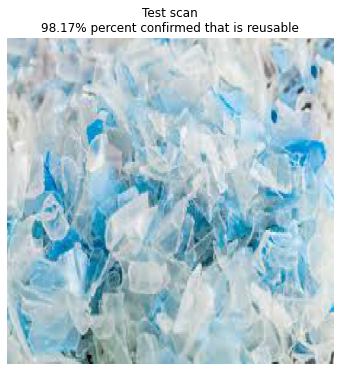

In [87]:
# Testing 
img_path = 'DATASET/R_129.jpg'
from tensorflow.keras.preprocessing import image
test_img = image.load_img(img_path, target_size=(500, 500,3),color_mode='rgb')
# Preprocessing the image
pp_test_img = image.img_to_array(test_img)
pp_test_img = pp_test_img/255
pp_test_img = np.expand_dims(pp_test_img, axis=0)
#predict
test_preds= model.predict(pp_test_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if test_preds>= 0.5: 
    out = ('{:.2%} percent confirmed that is reusable'.format(test_preds[0][0]))
    
else: 
    out = ('{:.2%} percent confirmed that this is organic'.format(1-test_preds[0][0]))
plt.title("Test scan\n"+out)  
plt.imshow(np.squeeze(pp_test_img))
plt.show()